> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

In [5]:
# ! jupyter nbconvert this_notebook.ipynb --to slides --post serve

<img src="./images/di.png" width="50" height="50" align="right"/>

# Data Visualization and Pipeline

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Why Use Data Visualization?

---

Because of the way the human brain processes information, charts or graphs that visualize large amounts of complex data are easier to understand than spreadsheets or reports. 

Data visualization is a quick, easy way to convey concepts in a universal  manner — and you can experiment with different scenarios by making slight adjustments.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [6]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](chart_suggestions.jpg)


# The Importance of visualization 

- Given the same data, different visualization styles can convey different messages 
- Examples here:

https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [7]:
# Read in the Boston housing data.
housing_csv = 'boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

## Understand each DataSet well before we try to visualize the data

In [8]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [10]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

In [11]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

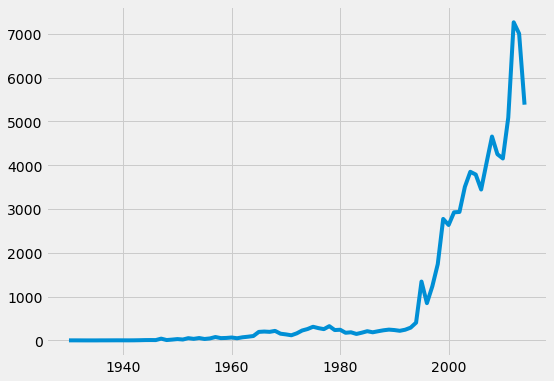

In [12]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot();

In [13]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

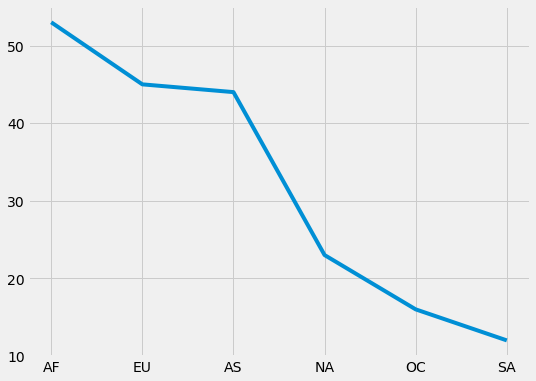

In [14]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot();

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

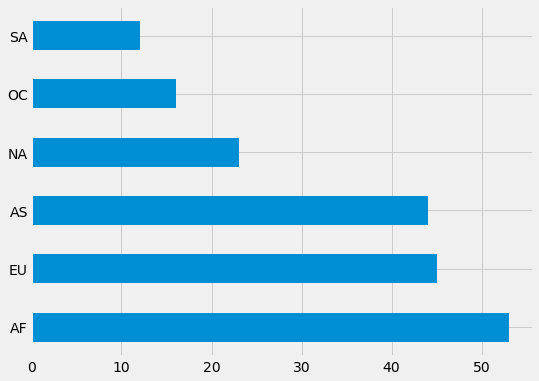

In [15]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
drinks.continent.value_counts().plot(kind='barh');

### Line Plot With a `DataFrame`

In [16]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [17]:
df

,col1,col2,col3,col4
a,0.178415,-1.001357,1.261026,0.454471
b,-0.459955,0.496706,-0.301416,-1.207359
c,0.753265,1.521583,0.260331,0.779151
d,-0.315148,-1.577697,-0.831668,0.173412
e,0.657782,-0.061555,-0.096528,-0.123705
f,1.669574,-0.401106,-0.791033,0.119289
g,0.011578,0.159467,-1.779604,-0.754786
h,-0.483333,0.809705,-0.120244,-0.049415
i,0.388461,0.010640,0.117502,0.842991
j,-0.846348,-0.467955,-1.587613,0.430622


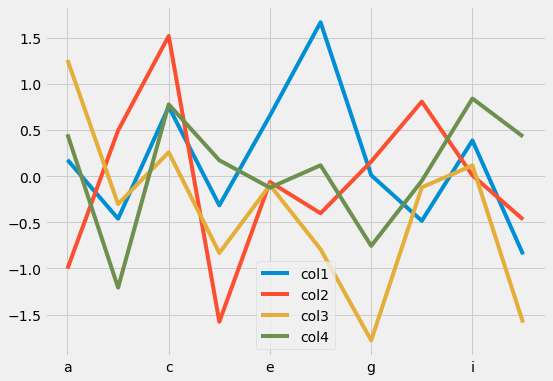

In [18]:
df.plot();

### How to change the size of a plot

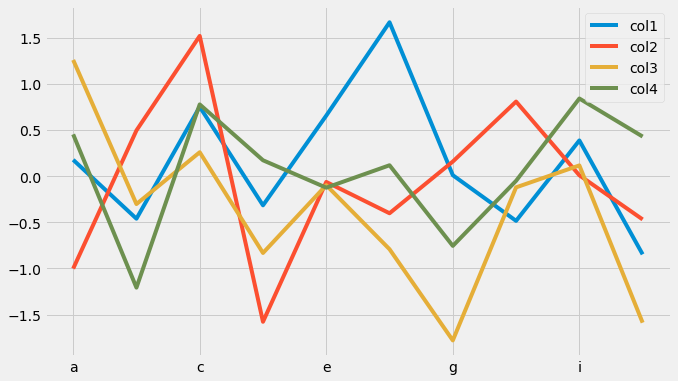

In [19]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
#   The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) elsewhere
df.plot(figsize=(10,6)); # width, height

### How to change the color of a plot

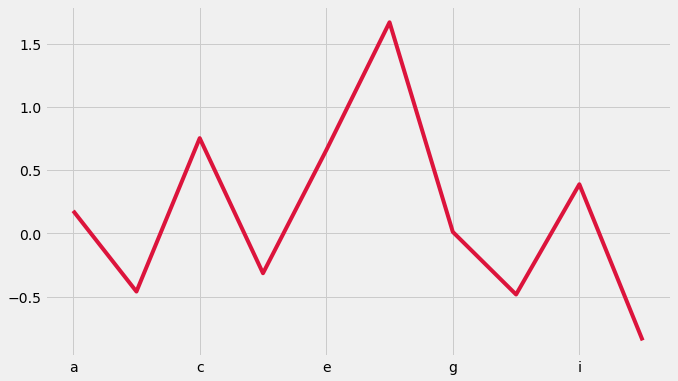

In [20]:
df['col1'].plot(color='crimson', figsize=(10,6));

### How to change the style of individual lines

## CheatSheet of Styles
https://raw.githubusercontent.com/rougier/matplotlib-cheatsheet/master/matplotlib-cheatsheet.png


https://matplotlib.org/2.0.2/api/colors_api.html

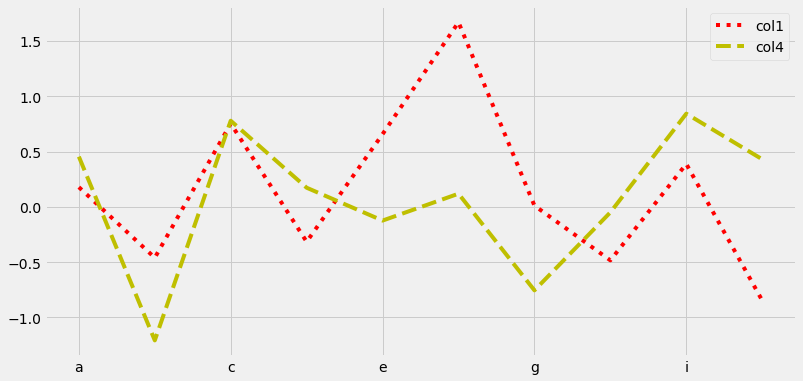

In [21]:
# : - dotted line, v - triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(12,6), style={'col1': ':r', 'col4': '--y'});

### Challenge: Create a line plot of `RM` and `MEDV` in the housing data. 

- For `RM`, use a solid green line. For `MEDV`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

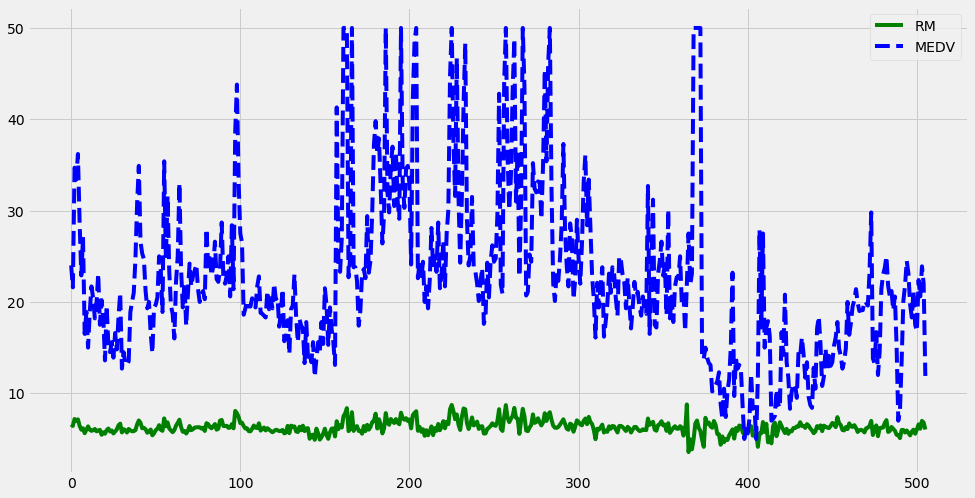

In [22]:
### Type your code here ....
housing[['RM', 'MEDV']].plot(figsize=(15,8), style={'RM': 'g', 'MEDV':'--b'});

## Lets use Percent Normalized (MAX)

In [23]:
housing['price_percent']=(housing['MEDV']/housing.MEDV.median())*100
housing['rm_percent']=(housing['RM']/housing.RM.median())*100
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_percent,rm_percent
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,113.207547,105.903197
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,101.886792,103.422727
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,163.679245,115.728437
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,157.547170,112.716437
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,170.754717,115.116373


<AxesSubplot:>

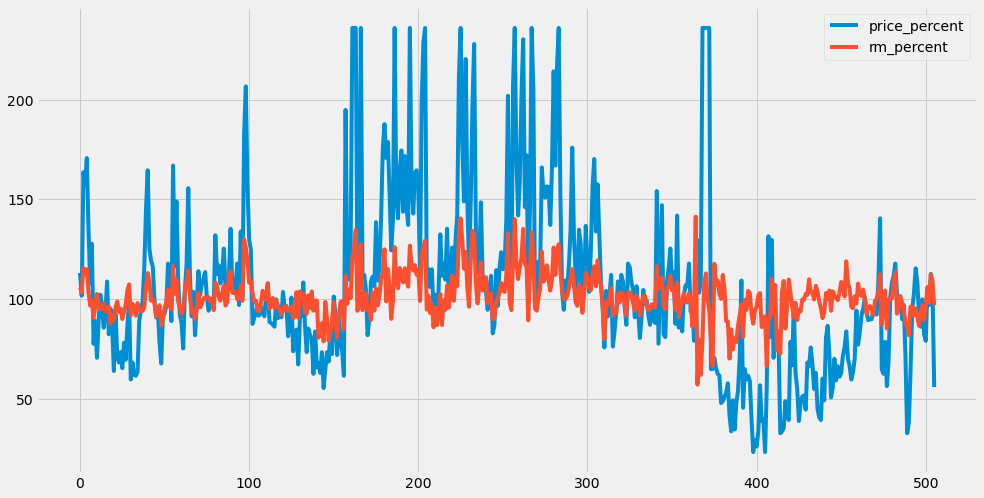

In [24]:
### Type your code here ....
housing[['price_percent', 'rm_percent']].plot(figsize=(15,8), style={'RM': 'g', 'MEDV':'--k'})

In [25]:
housing.drop(['price_percent','rm_percent'],axis=1,inplace=True)

### some Styles you can play with

In [26]:
#%matplotlib inline
#plt.style.use('dark_background')
#plt.style.use('classic')

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [27]:
# Count the number of countries in each continent.
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<AxesSubplot:title={'center':'Hi'}>

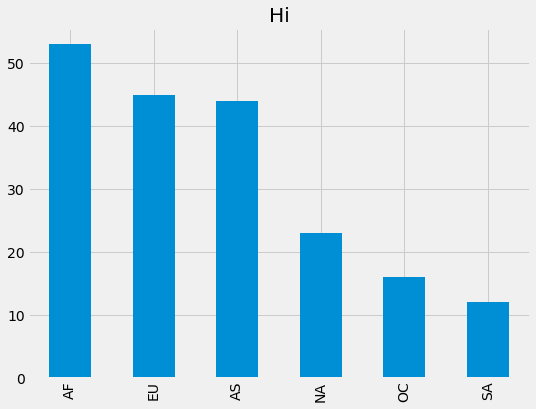

In [28]:
drinks.continent.value_counts().plot(kind='bar', title="Hi")

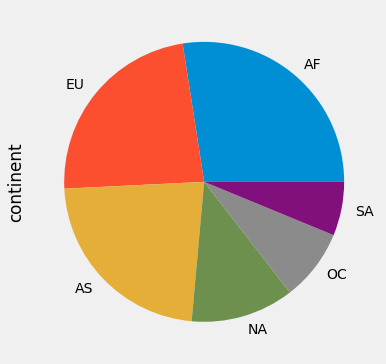

In [29]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='pie');

In [30]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


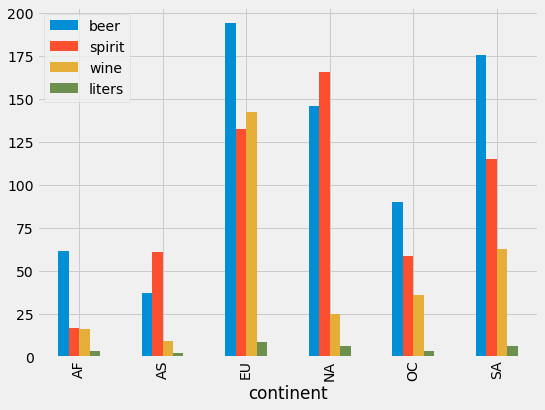

In [31]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

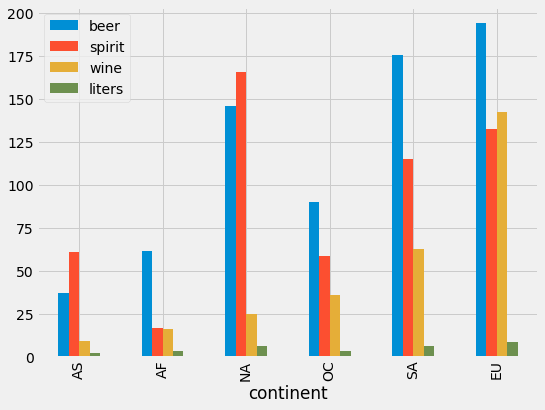

In [32]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('wine').plot(kind='bar');

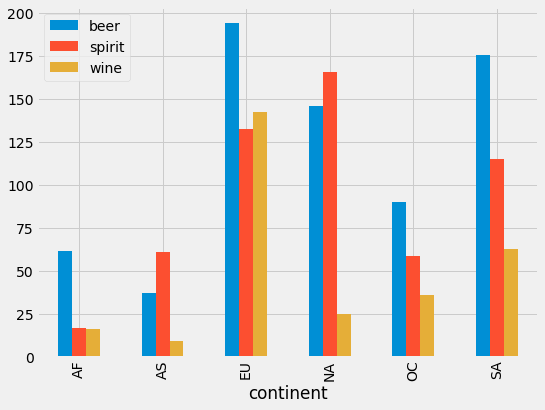

In [33]:
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar');

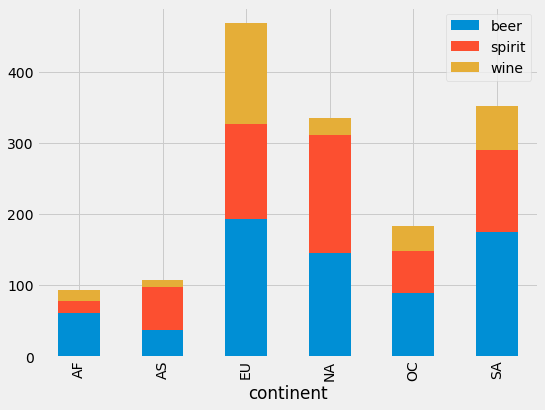

In [34]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

In [35]:
df.head()

,col1,col2,col3,col4
a,0.178415,-1.001357,1.261026,0.454471
b,-0.459955,0.496706,-0.301416,-1.207359
c,0.753265,1.521583,0.260331,0.779151
d,-0.315148,-1.577697,-0.831668,0.173412
e,0.657782,-0.061555,-0.096528,-0.123705


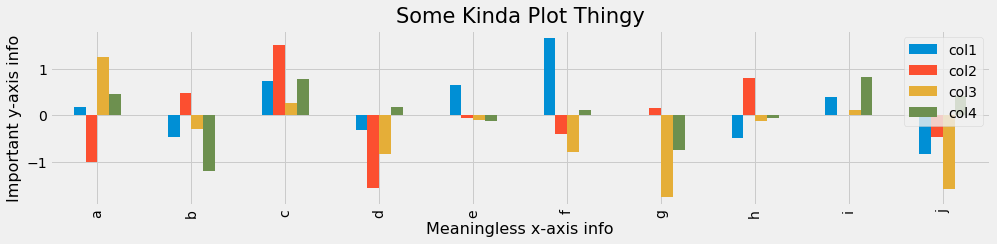

In [36]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

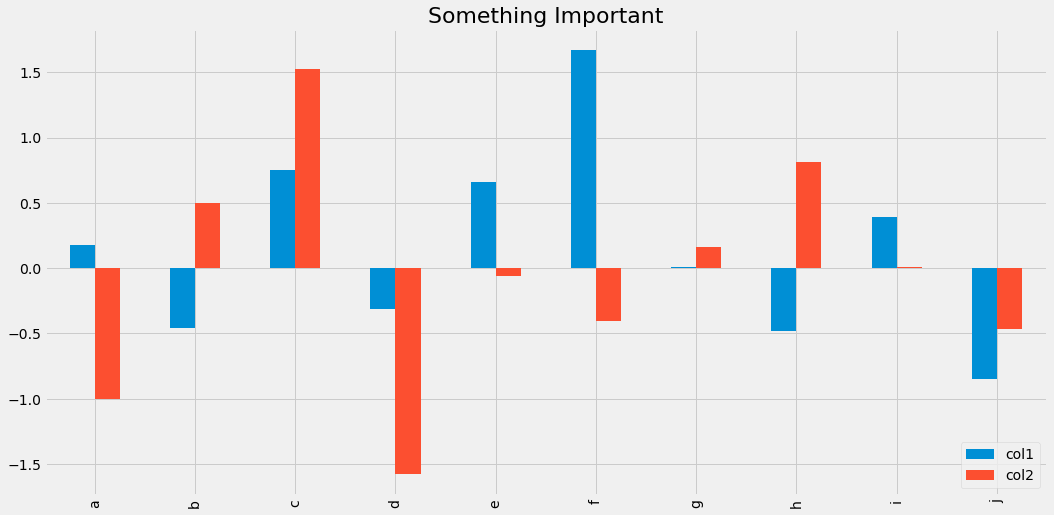

In [37]:
ax = df[['col1','col2']].plot(kind='bar', figsize=(16,8));
ax.set_title('Something Important', fontsize=22);
ax.legend(loc=4);

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

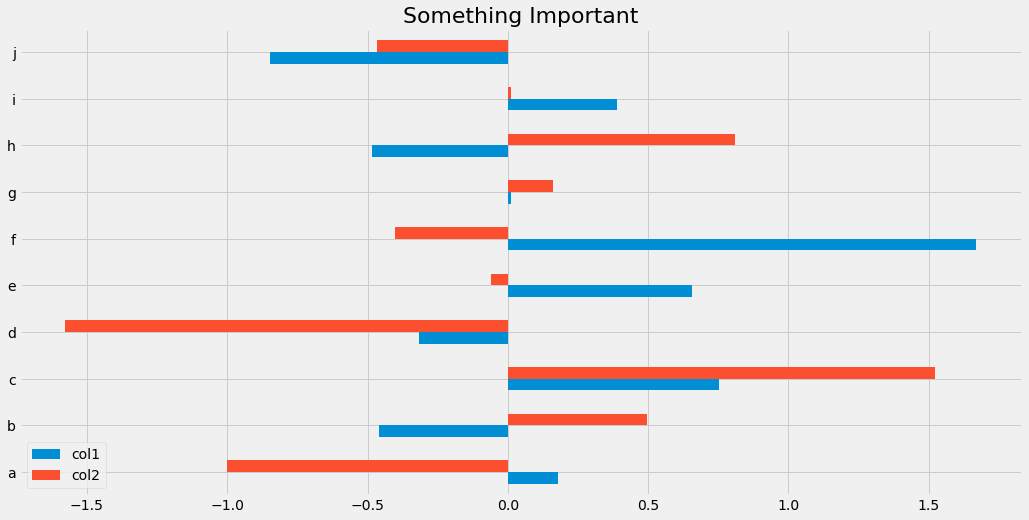

In [38]:
ax = df[['col1','col2']].plot(kind='barh', figsize=(16,8));
ax.set_title('Something Important', fontsize=22);
ax.legend(loc=3);

### Stacked works on horizontal bar charts.

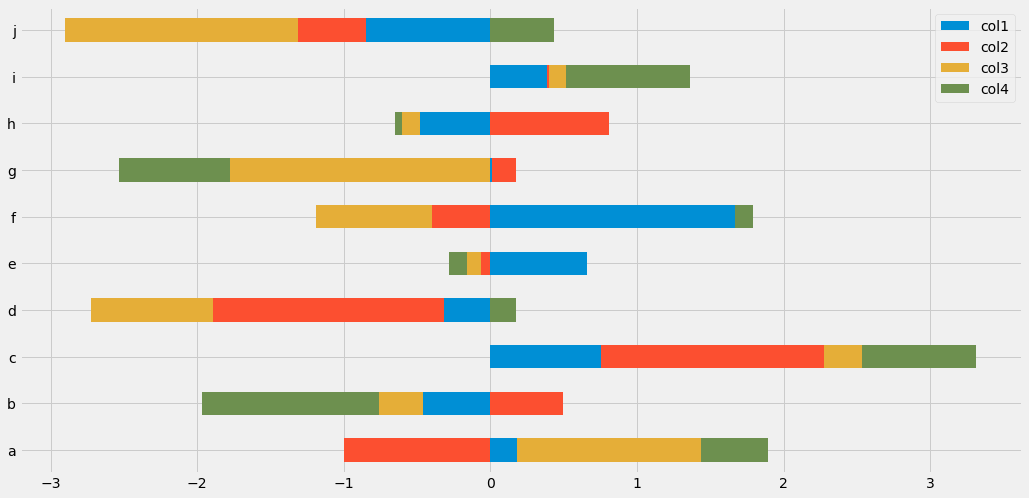

In [39]:
df.plot(kind='barh', stacked=True, figsize=(16,8));

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [40]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

In [41]:
drinks.shape

(193, 6)

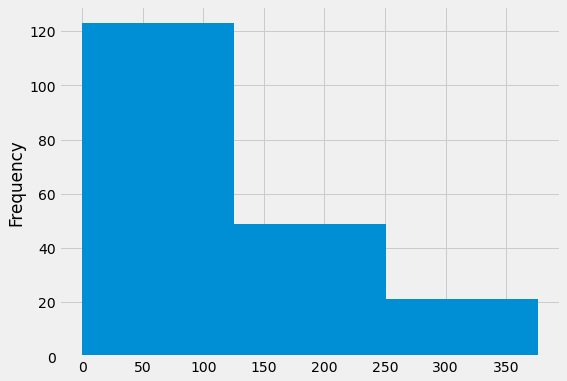

In [42]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist', bins=3);

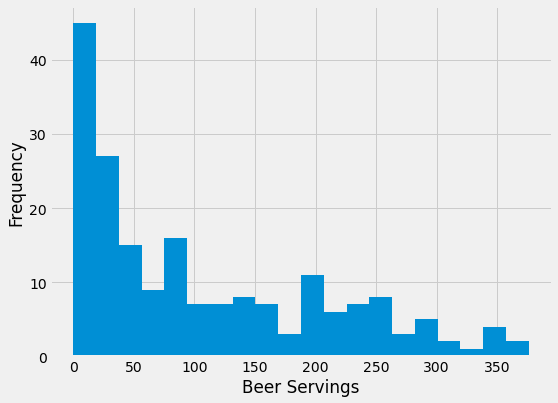

In [43]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

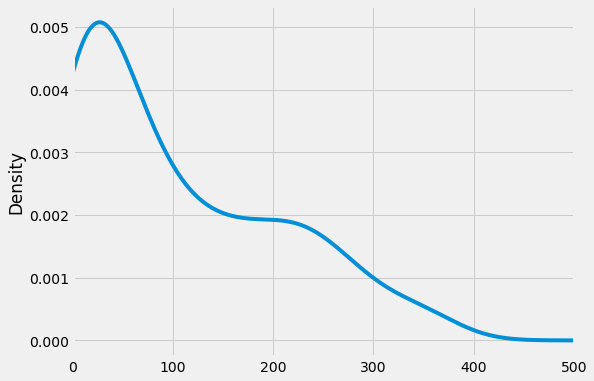

In [44]:
# Compare with density plot (smooth version of a histogram).
drinks.beer.plot(kind='density', xlim=(0, 500));

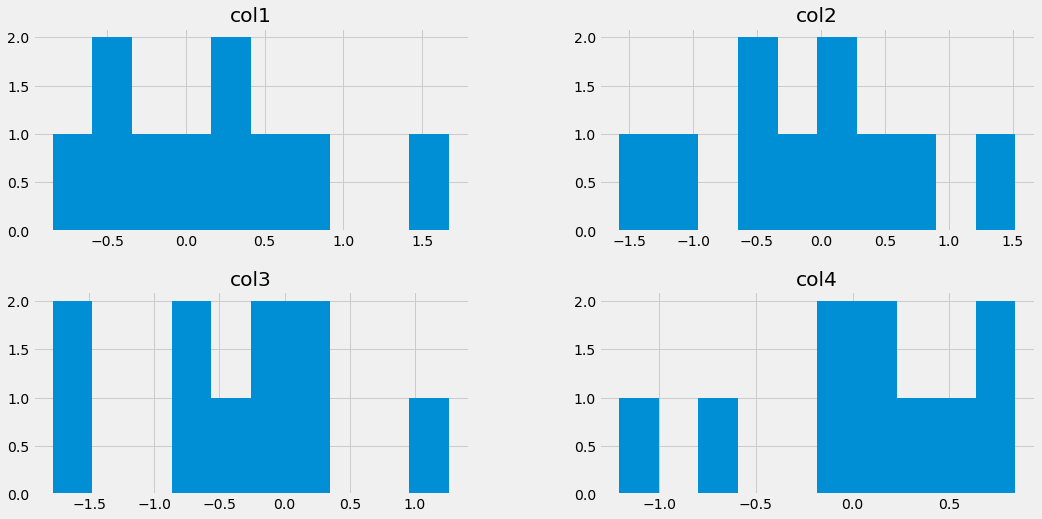

In [45]:
# Making histograms of DataFrames — histogram of random data
df.hist(figsize=(16,8));

### Single Histogram

In [46]:
norm = np.random.standard_normal(50000)

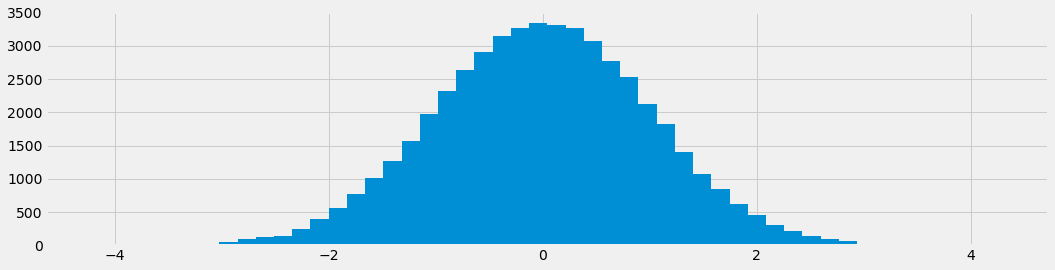

In [47]:
pd.Series(norm).hist(figsize=(16,4), bins=50);

### Another bins example: Sometimes the binning makes the data look different or misleading.

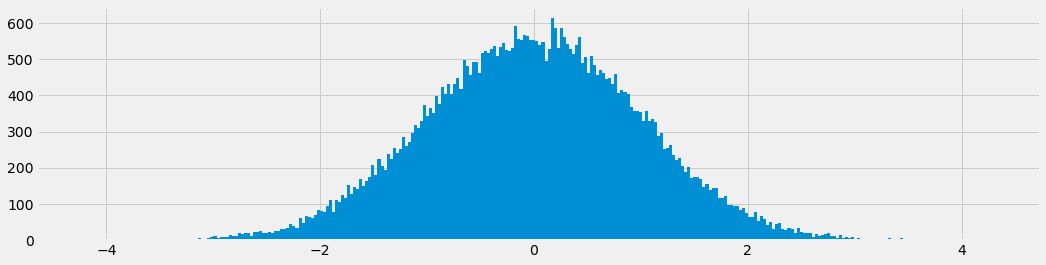

In [48]:
pd.Series(norm).hist(figsize=(16,4), bins=300);

# Challenge: 
### Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

In [49]:
# Do a hist for housing MEDV column

In [50]:
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [51]:
### Type your answer here


<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

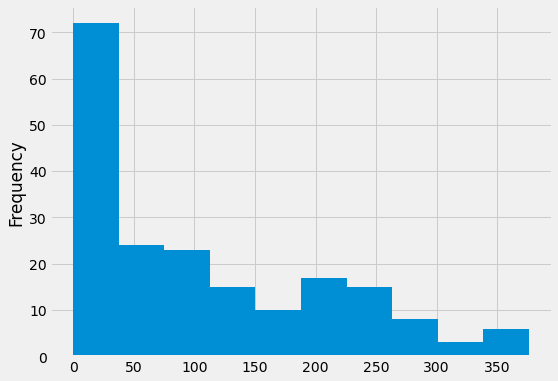

In [52]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

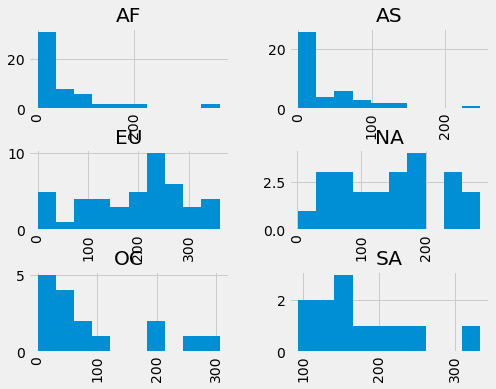

In [53]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column='beer', by='continent');

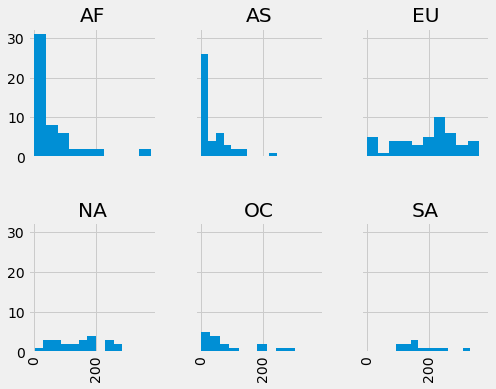

In [54]:
# Share the x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

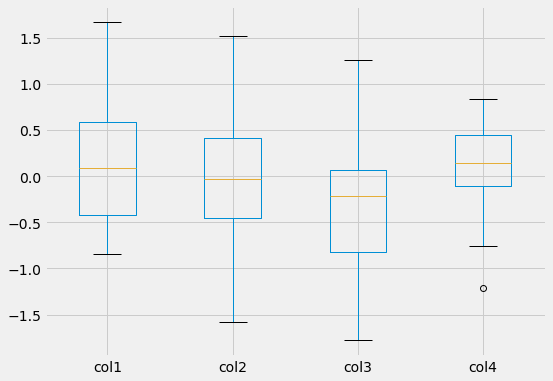

In [55]:
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [56]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [57]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

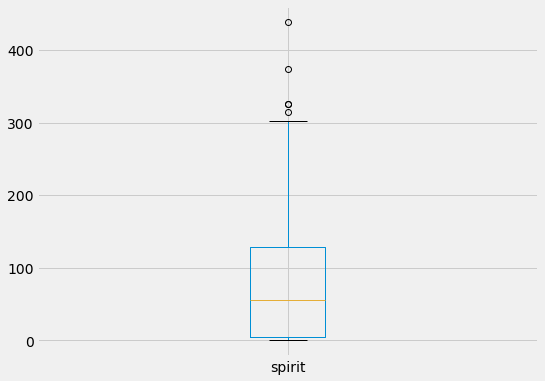

In [58]:
# Compare with box plot.
drinks.spirit.plot(kind='box');

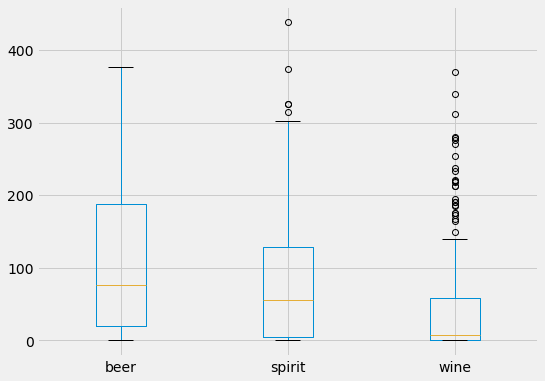

In [59]:
# Include multiple variables.
drinks.drop('liters', axis=1).plot(kind='box');

### How to use a box plot to preview the distributions in the housing data

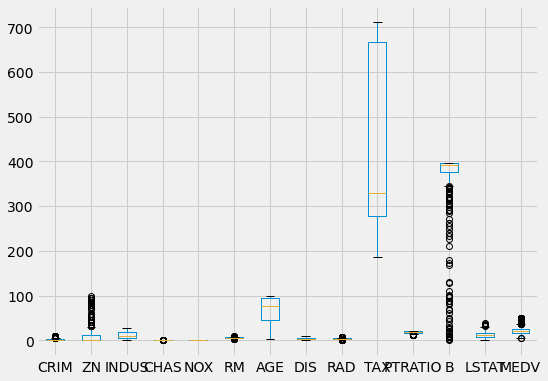

In [60]:
housing.boxplot();

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

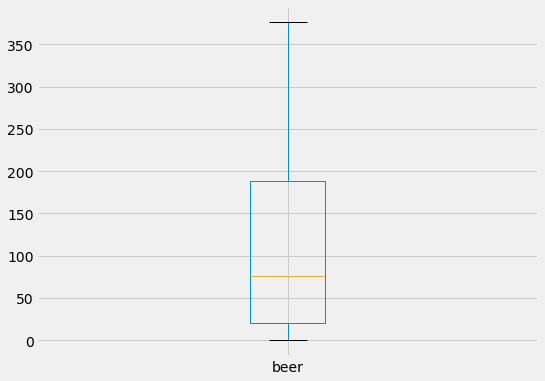

In [61]:
# Reminder: box plot of beer servings
drinks.beer.plot(kind='box');

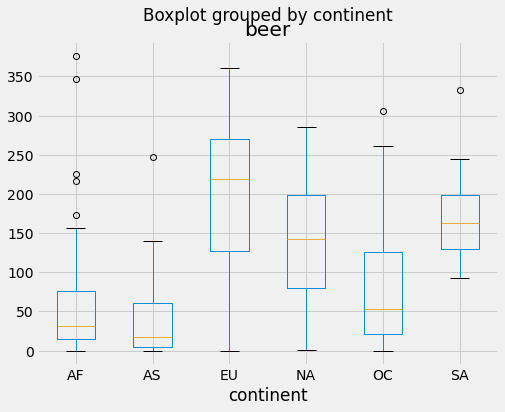

In [62]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

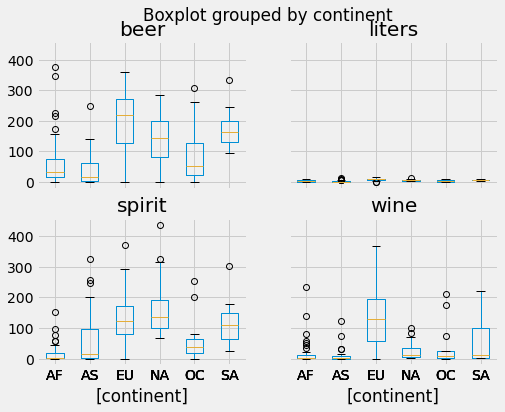

In [63]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [64]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

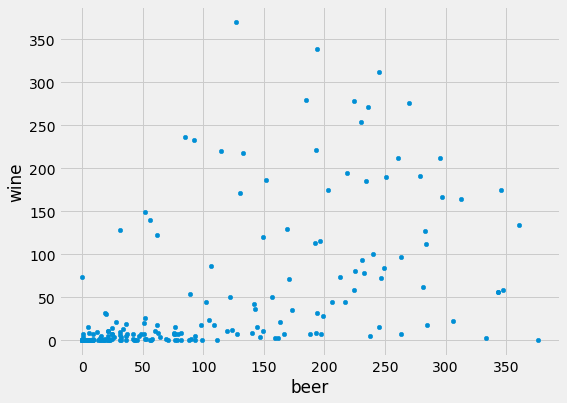

In [65]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine');

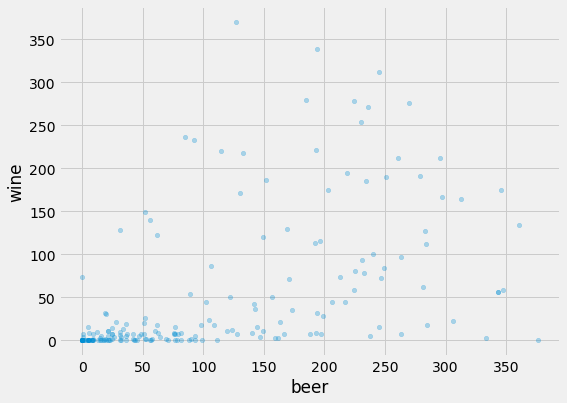

In [66]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

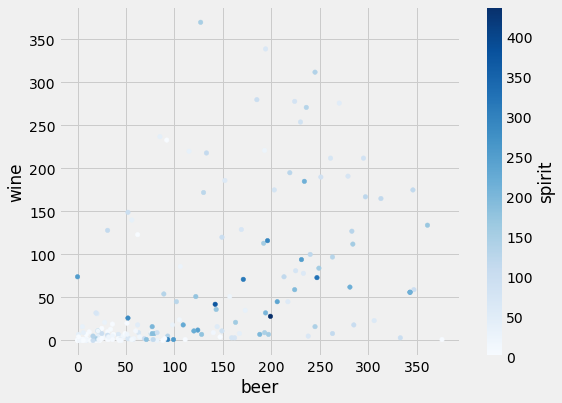

In [67]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

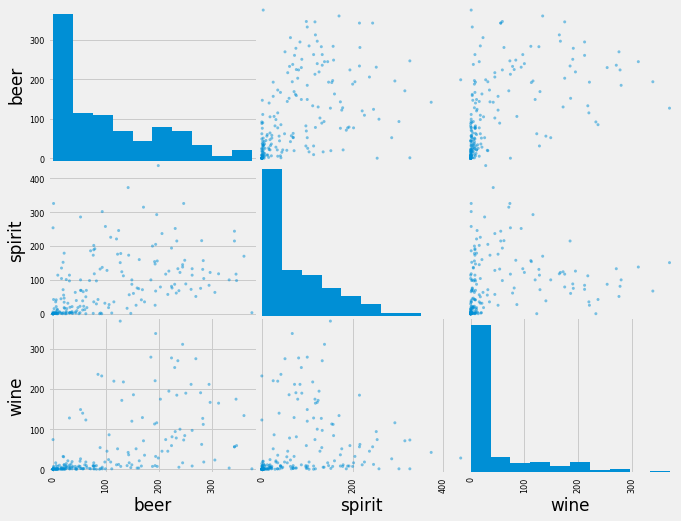

In [68]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

### Plotting `DataFrames`

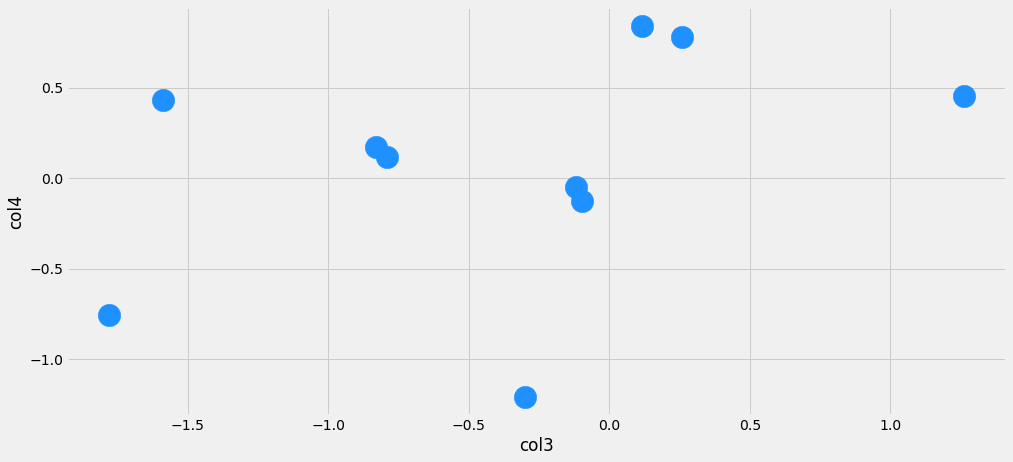

In [69]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',figsize=(15,7), s=500);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

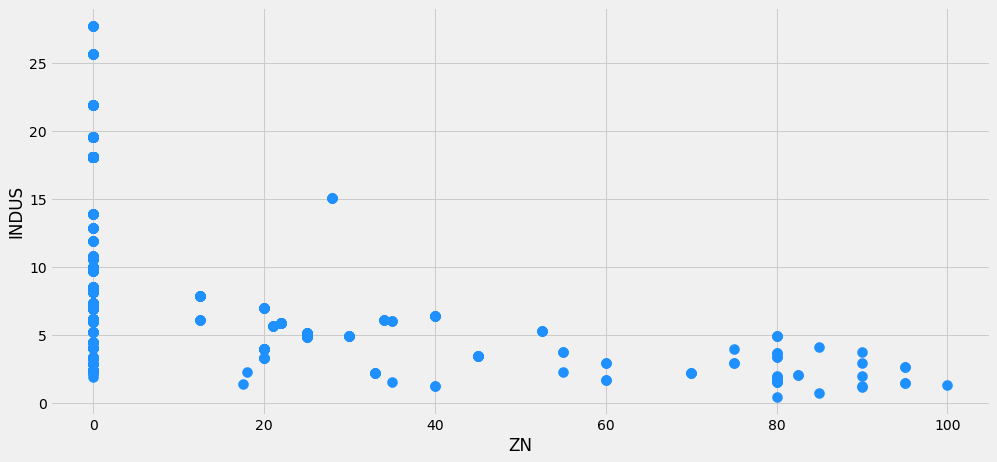

In [70]:
housing.plot(x='ZN', y='INDUS', kind='scatter', color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

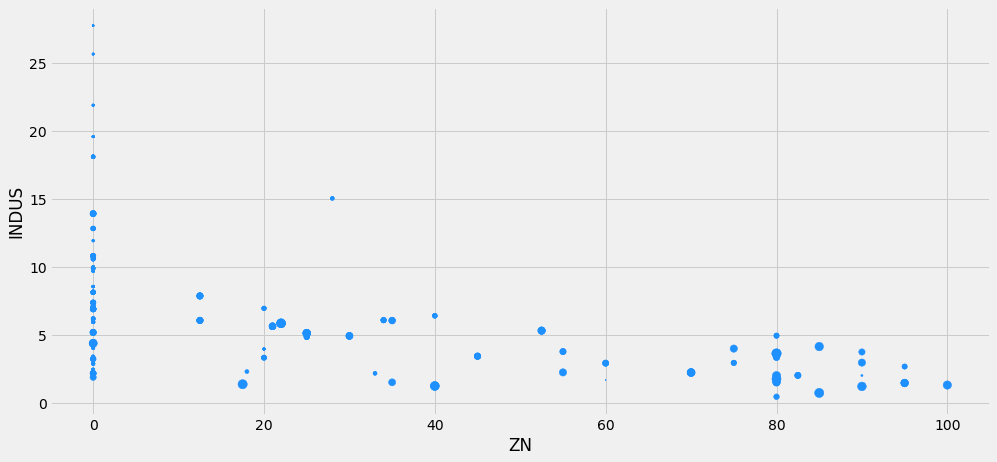

In [71]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
             color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.

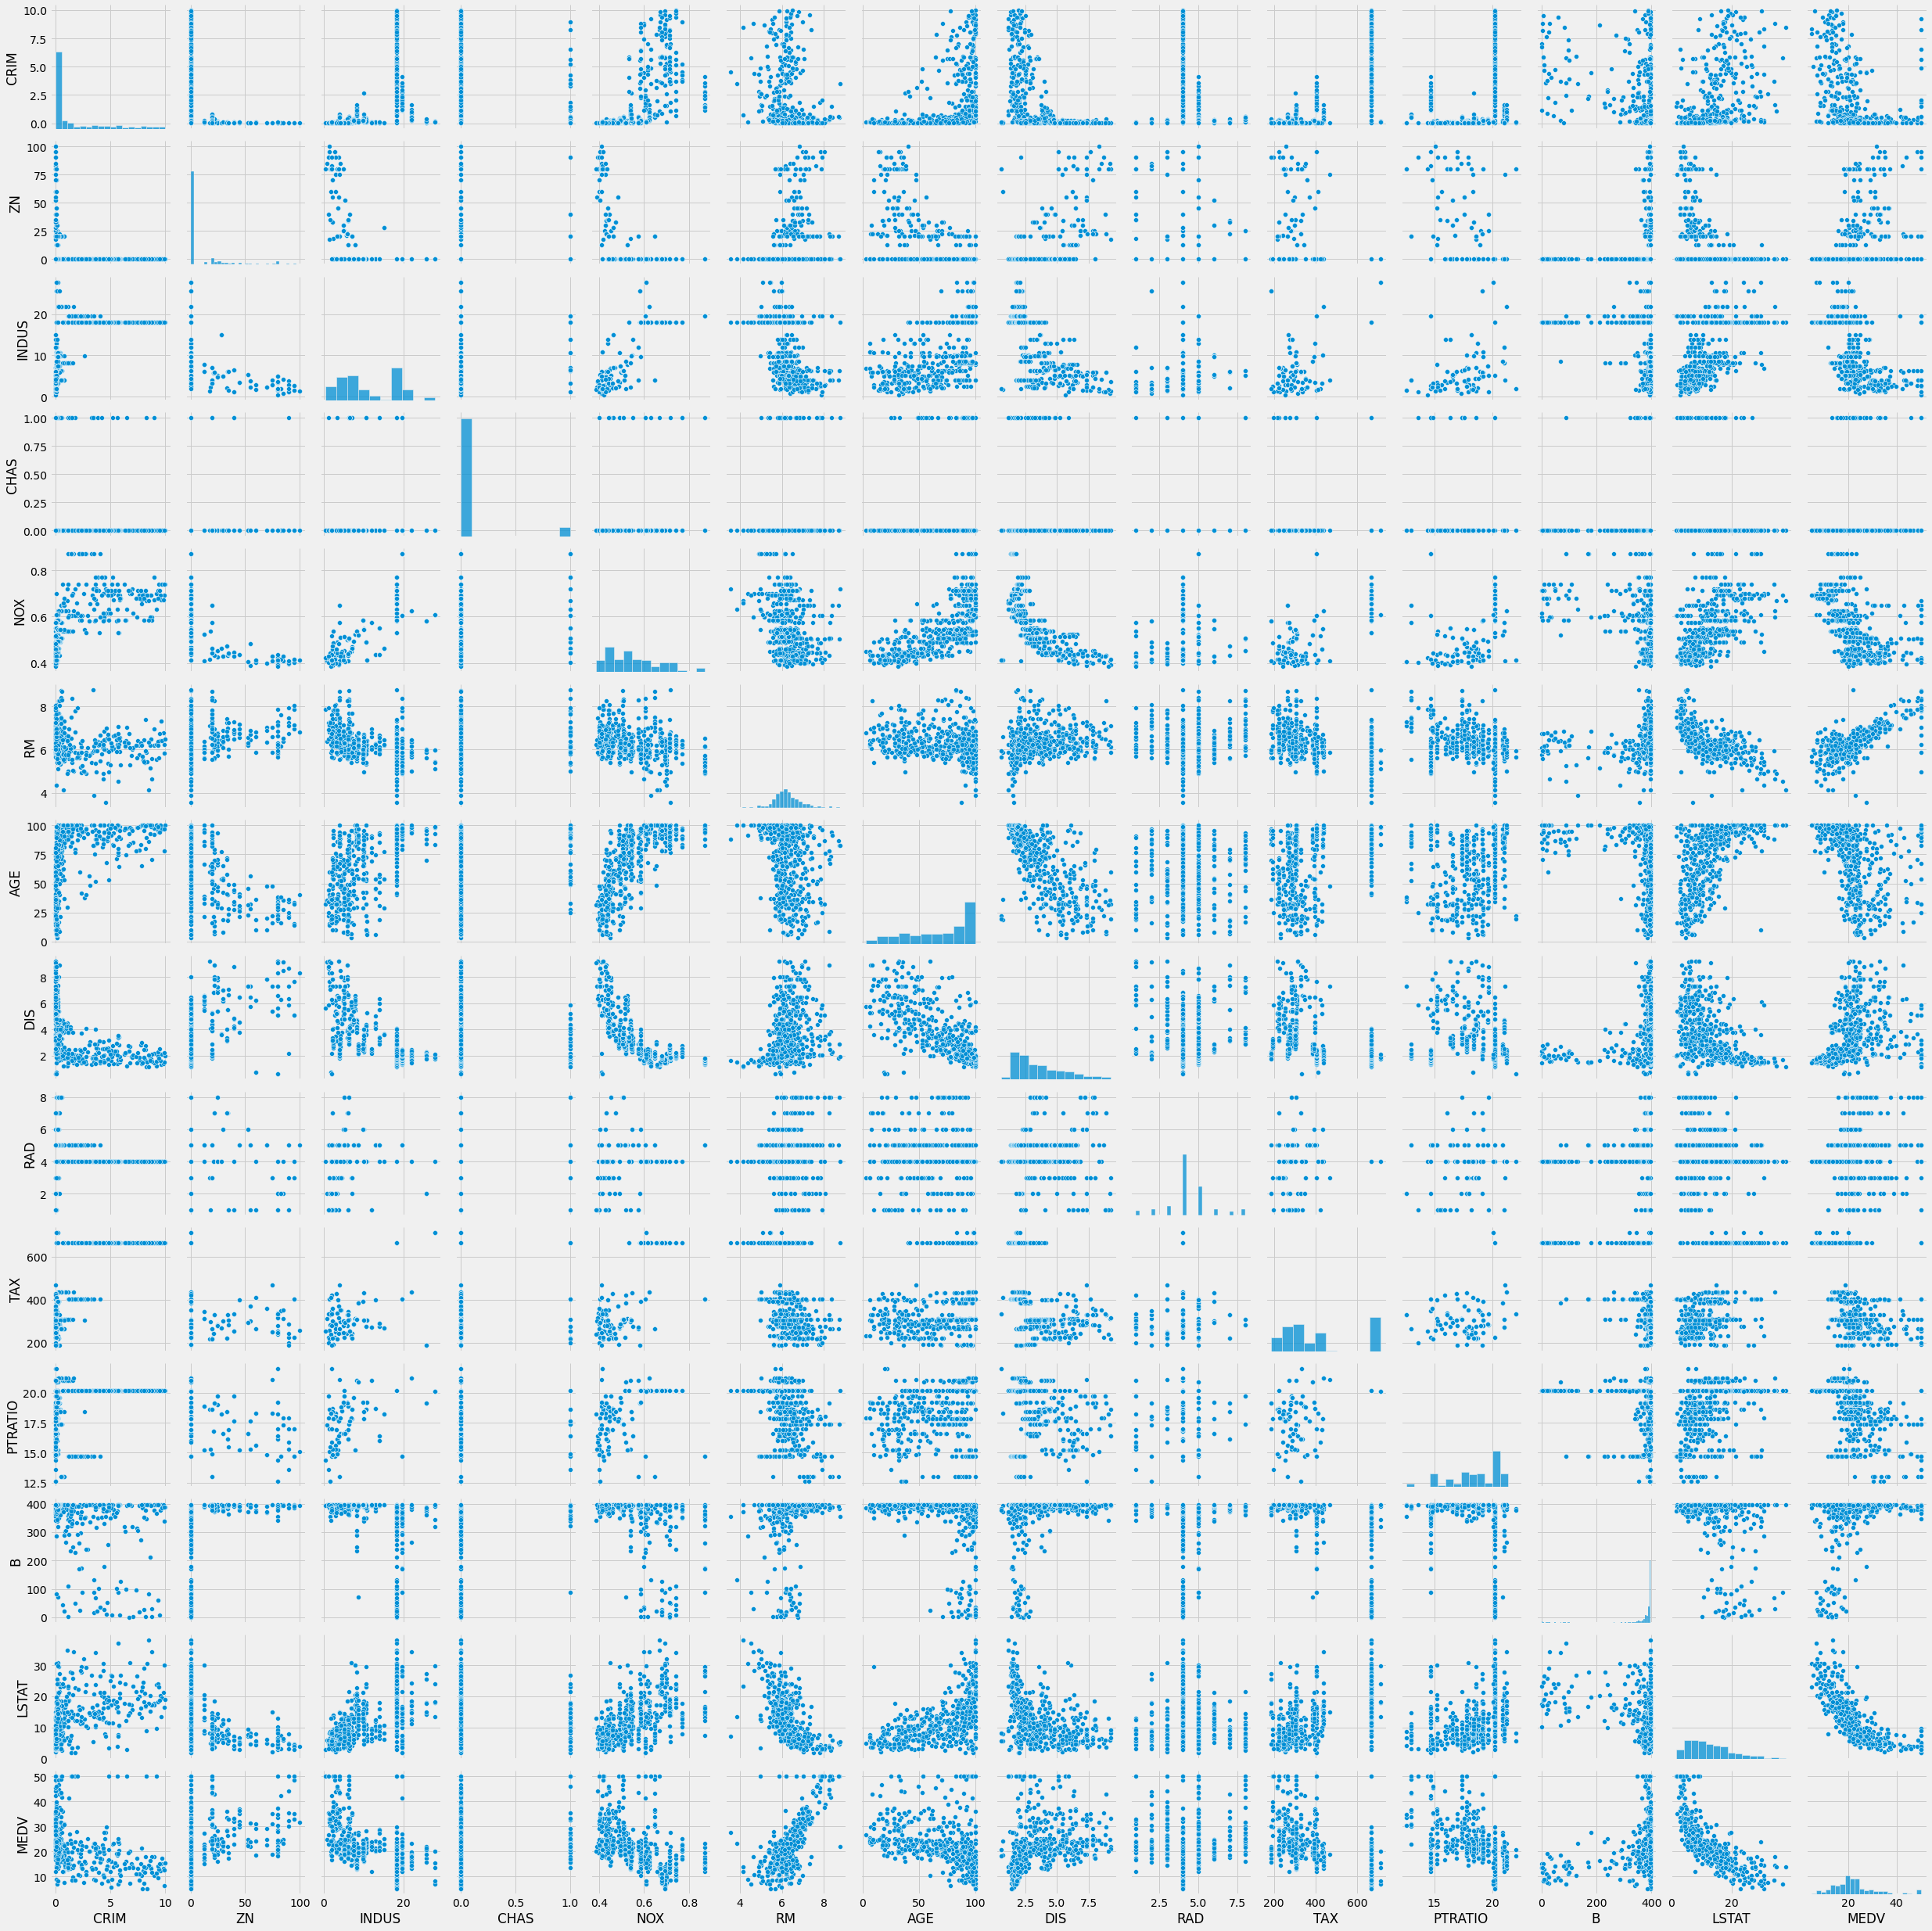

In [72]:
sns.pairplot(housing);

## What do each of the elements represent? Is this more or less useful than the previous plot?

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

In [73]:
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [74]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
RAD,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


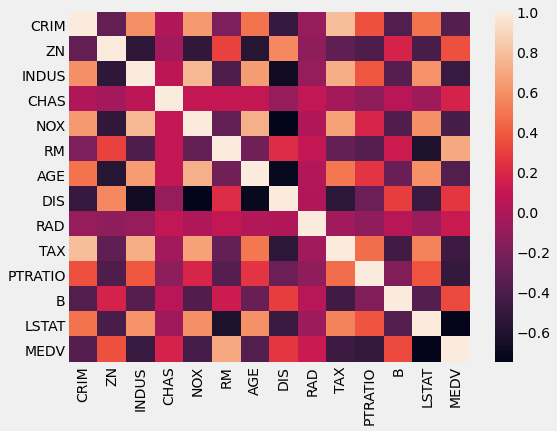

In [75]:
# Make a heatmap on the correlations between variables in the housing data:
sns.heatmap(housing.corr());

### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

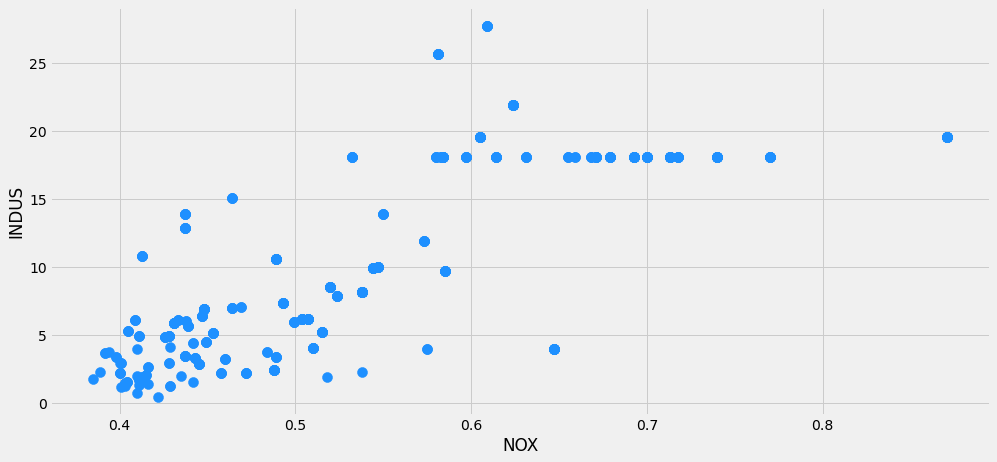

In [76]:
housing.plot(x='NOX', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

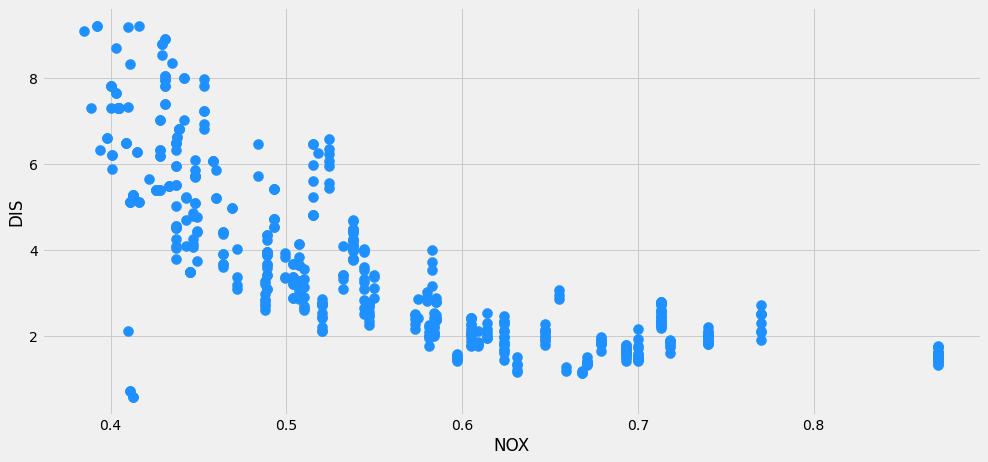

In [77]:
housing.plot(x='NOX', y='DIS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

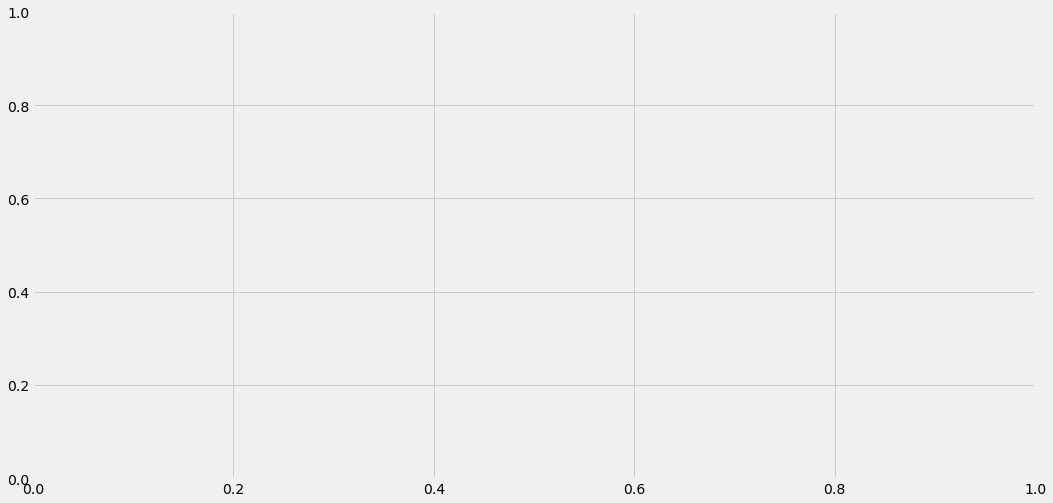

In [78]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

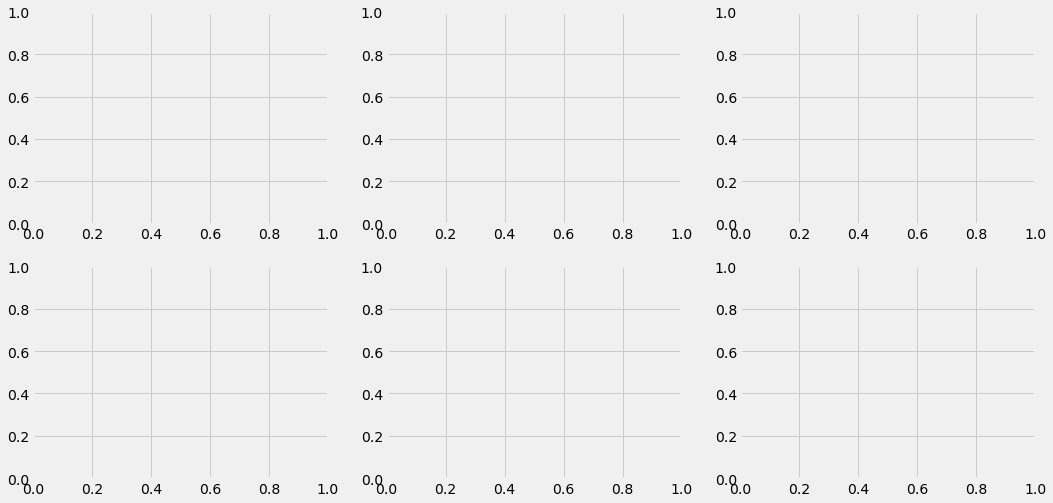

In [79]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

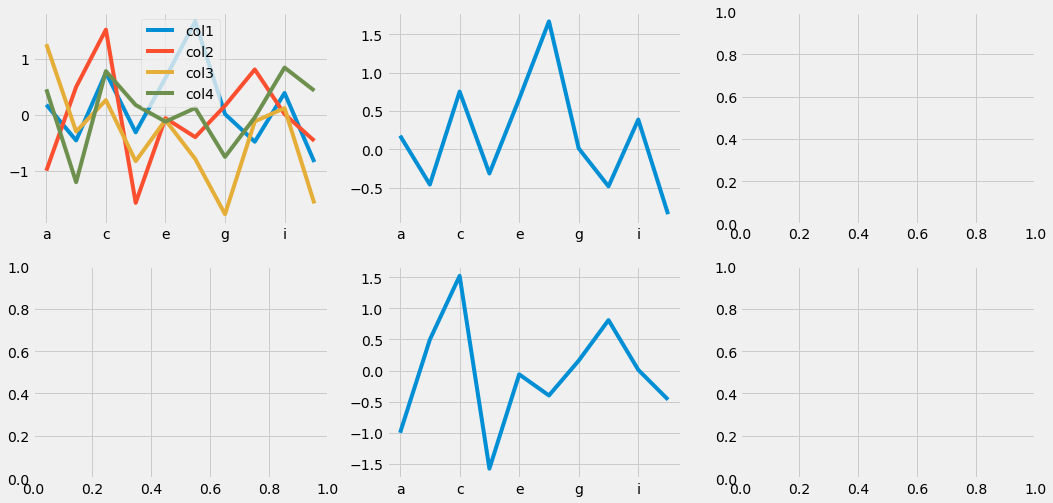

In [80]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

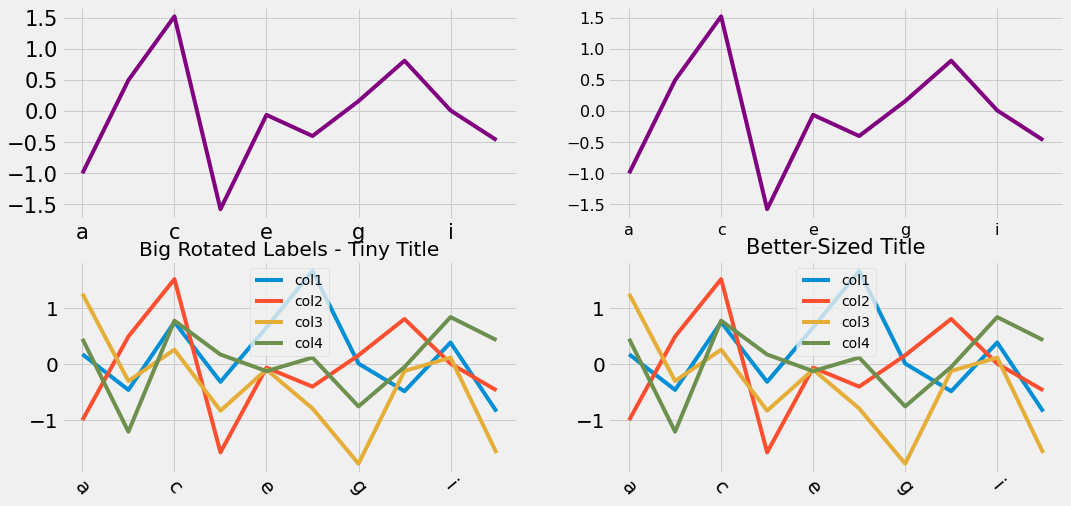

In [81]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

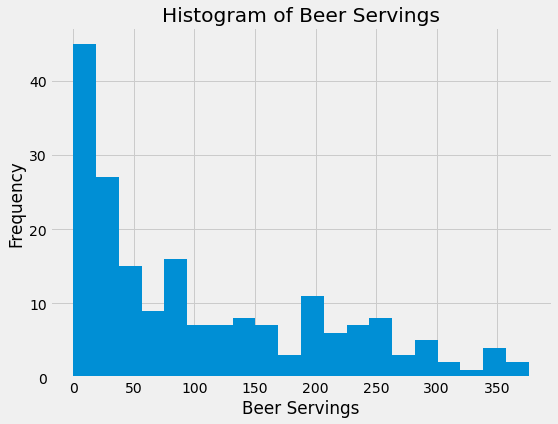

In [82]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [83]:
# List available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [84]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works